In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import twstock

In [3]:
target_stock = '0056'  #股票代號變數
stock = twstock.Stock(target_stock)  #告訴twstock我們要查詢的股票
target_price = stock.fetch_from(2015, 1)  #取用2020/05至今每天的交易資料

In [4]:
name_attribute = [ 'Datetime','交易量', '換手量', '開盤價', '當日最高', '當日最低', '收盤價', 'Change',
    'Transcation'
]  #幫收集到的資料設定表頭

In [5]:
df = pd.DataFrame(columns=name_attribute, data=target_price)

In [6]:
df.head()

,Datetime,交易量,換手量,開盤價,當日最高,當日最低,收盤價,Change,Transcation
0,2015-01-05,508718,12264292,24.16,24.16,24.01,24.15,-0.01,306
1,2015-01-06,908140,21728940,24.08,24.08,23.86,23.89,-0.26,669
2,2015-01-07,336998,8049422,23.85,23.95,23.83,23.91,0.02,218
3,2015-01-08,760481,18343318,23.96,24.17,23.96,24.12,0.21,374
4,2015-01-09,375900,9093855,24.15,24.25,24.15,24.16,0.04,208


In [7]:
df1 = df[['Datetime','交易量']]
df1

,Datetime,交易量
0,2015-01-05,508718
1,2015-01-06,908140
2,2015-01-07,336998
3,2015-01-08,760481
4,2015-01-09,375900
...,...,...
2141,2023-10-13,59696232
2142,2023-10-16,72791020
2143,2023-10-17,101406052
2144,2023-10-18,168641463


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     2146 non-null   datetime64[ns]
 1   交易量          2146 non-null   int64         
 2   換手量          2146 non-null   int64         
 3   開盤價          2146 non-null   float64       
 4   當日最高         2146 non-null   float64       
 5   當日最低         2146 non-null   float64       
 6   收盤價          2146 non-null   float64       
 7   Change       2146 non-null   float64       
 8   Transcation  2146 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 151.0 KB


In [9]:
from datetime import datetime

#transfer Datetime column to datetime format
df.Datetime = pd.to_datetime(df.Datetime, format='%d-%m-%Y %H:%M')

In [10]:
train = df[df['Datetime'] < '2018-10-31 23:59:59']
test = df[df['Datetime'] >= '2018-10-31 23:59:59']

In [11]:
train.index = train.Datetime
train = train.resample('D').mean()
test.index = test.Datetime
test = test.resample('D').mean()

In [12]:
test

,交易量,換手量,開盤價,當日最高,當日最低,收盤價,Change,Transcation
Datetime,,,,,,,,
2018-11-01,5378249.0,1.291382e+08,23.86,24.14,23.80,24.08,0.30,2428.0
2018-11-02,4261606.0,1.028733e+08,24.16,24.20,24.08,24.18,0.10,1979.0
2018-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-05,3685918.0,8.892114e+07,24.16,24.18,24.05,24.18,0.00,1716.0
...,...,...,...,...,...,...,...,...
2023-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-16,72791020.0,2.582868e+09,35.58,35.58,35.43,35.52,-0.20,40044.0
2023-10-17,101406052.0,3.591778e+09,35.67,35.73,35.24,35.27,-0.25,51848.0


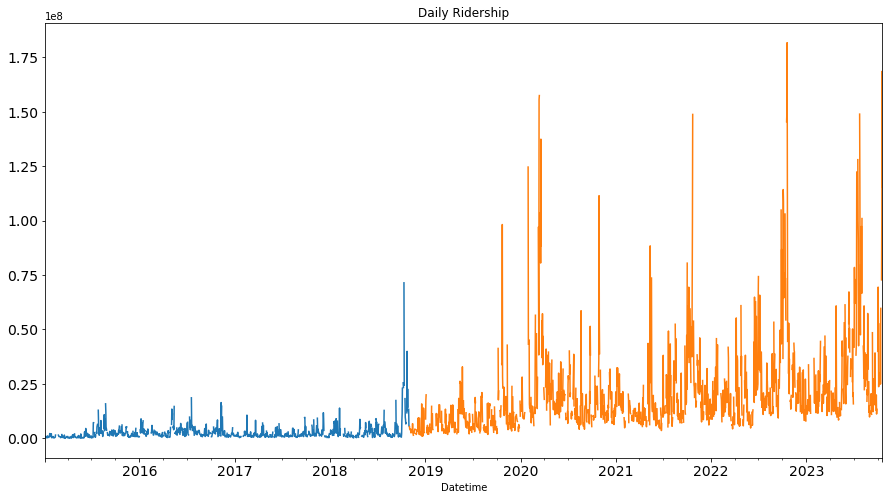

In [14]:
#Plotting data
train.交易量.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.交易量.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [15]:
"""
參考資料：https://medium.com/%E5%AE%85%E7%94%B7%E9%9B%9C%E5%AD%B8%E7%AD%86%E8%A8%98/data-science-%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97%E5%88%86%E6%9E%90%E5%88%9D%E6%8E%A2-1-6d13c2a673c4
"""

'\n參考資料：https://medium.com/%E5%AE%85%E7%94%B7%E9%9B%9C%E5%AD%B8%E7%AD%86%E8%A8%98/data-science-%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97%E5%88%86%E6%9E%90%E5%88%9D%E6%8E%A2-1-6d13c2a673c4\n'